In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [ ]:
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import datetime

In [ ]:
start = '2000-01-01'
end = datetime.datetime.today()

df = data.DataReader('TSLA', 'stooq', start, end)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-29,120.385,123.5700,117.495,121.82,221923313.0
2022-12-28,110.350,116.2700,108.240,112.71,221070537.0
2022-12-27,117.495,119.6700,108.760,109.10,208643444.0
2022-12-23,126.370,128.6173,121.020,123.15,166989688.0
2022-12-22,136.000,136.6300,122.260,125.35,210090250.0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-07-02,1.53333,1.54000,1.24733,1.28000,77127105.0
2010-07-01,1.66667,1.72800,1.35133,1.46400,123447945.0
2010-06-30,1.71933,2.02800,1.55333,1.58867,257915910.0
2010-06-29,1.26667,1.66667,1.16933,1.59267,281749140.0
2010-06-28,1.13333,1.13333,1.13333,1.13333,NaN


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-12-29,120.385,123.5700,117.495,121.82,221923313.0
1,2022-12-28,110.350,116.2700,108.240,112.71,221070537.0
2,2022-12-27,117.495,119.6700,108.760,109.10,208643444.0
3,2022-12-23,126.370,128.6173,121.020,123.15,166989688.0
4,2022-12-22,136.000,136.6300,122.260,125.35,210090250.0


In [ ]:
df=df.drop(['Date'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,120.385,123.5700,117.495,121.82,221923313.0
1,110.350,116.2700,108.240,112.71,221070537.0
2,117.495,119.6700,108.760,109.10,208643444.0
3,126.370,128.6173,121.020,123.15,166989688.0
4,136.000,136.6300,122.260,125.35,210090250.0


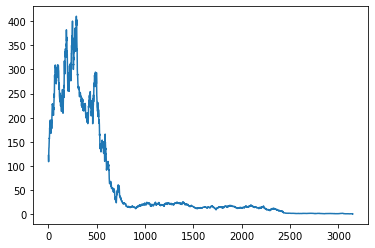

In [ ]:
plt.plot(df.Close)

In [ ]:
df

,Open,High,Low,Close,Volume
0,120.38500,123.57000,117.49500,121.82000,221923313.0
1,110.35000,116.27000,108.24000,112.71000,221070537.0
2,117.49500,119.67000,108.76000,109.10000,208643444.0
3,126.37000,128.61730,121.02000,123.15000,166989688.0
4,136.00000,136.63000,122.26000,125.35000,210090250.0
...,...,...,...,...,...
3144,1.53333,1.54000,1.24733,1.28000,77127105.0
3145,1.66667,1.72800,1.35133,1.46400,123447945.0
3146,1.71933,2.02800,1.55333,1.58867,257915910.0
3147,1.26667,1.66667,1.16933,1.59267,281749140.0


In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3144    1.415586
3145    1.407960
3146    1.403186
3147    1.399186
3148    1.390860
Name: Close, Length: 3149, dtype: float64

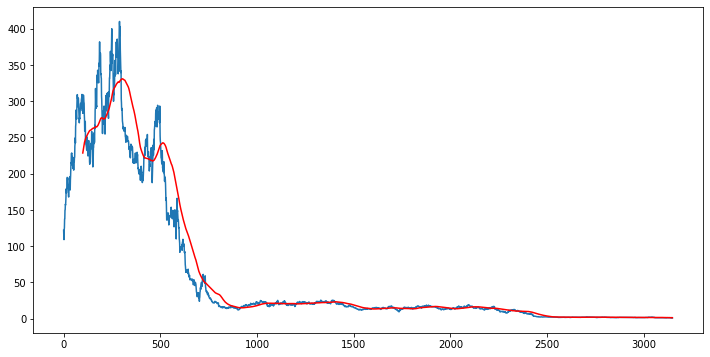

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3144    1.584217
3145    1.583193
3146    1.582610
3147    1.582193
3148    1.579550
Name: Close, Length: 3149, dtype: float64

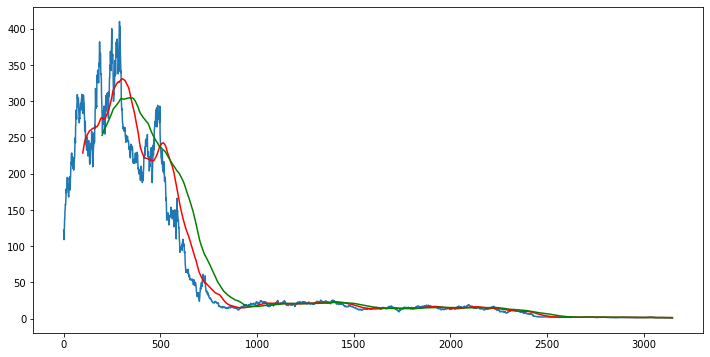

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [ ]:
df.shape

(3149, 5)

In [ ]:
#Splitting data into training and testing 

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2204, 1)
(945, 1)


In [ ]:
data_training.head()

,Close
0,121.82
1,112.71
2,109.10
3,123.15
4,125.35


In [ ]:
data_testing.head()

,Close
2204,13.8967
2205,14.1580
2206,13.8213
2207,14.1973
2208,14.6960


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
data_training_arr = scaler.fit_transform(data_training)
data_training_arr

array([[0.28033028],
       [0.25757757],
       [0.24856141],
       ...,
       [0.01360841],
       [0.01442262],
       [0.01220479]])

In [ ]:
data_training_arr.shape

(2204, 1)

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100: i])
    y_train.append(data_training_arr[i, 0])
  
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Ml Model

In [ ]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
66/66 [==============================] - 28s 327ms/step - loss: 0.0260
Epoch 2/50
66/66 [==============================] - 28s 427ms/step - loss: 0.0059
Epoch 3/50
66/66 [==============================] - 22s 328ms/step - loss: 0.0055
Epoch 4/50
66/66 [==============================] - 25s 381ms/step - loss: 0.0045
Epoch 5/50
66/66 [==============================] - 22s 327ms/step - loss: 0.0051
Epoch 6/50
66/66 [==============================] - 22s 330ms/step - loss: 0.0046
Epoch 7/50
66/66 [==============================] - 22s 331ms/step - loss: 0.0039
Epoch 8/50
66/66 [==============================] - 22s 329ms/step - loss: 0.0035
Epoch 9/50
66/66 [==============================] - 21s 325ms/step - loss: 0.0034
Epoch 10/50
66/66 [==============================] - 21s 322ms/step - loss: 0.0041
Epoch 11/50
66/66 [==============================] - 22s 330ms/step - loss: 0.0033
Epoch 12/50
66/66 [==============================] - 30s 449ms/step - loss: 0.0031
Epoch 13/50
6

In [ ]:
model.save('keras_project_ml_model')

In [ ]:
model.save('keras_project_ml_model.h5')


In [ ]:
data_testing.head()

,Close
2204,13.8967
2205,14.1580
2206,13.8213
2207,14.1973
2208,14.6960


In [ ]:
data_training.tail(100)

,Close
2104,16.9560
2105,17.0473
2106,17.1173
2107,17.3293
2108,17.4673
...,...
2199,13.8347
2200,14.1487
2201,15.0267
2202,15.3527


In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [ ]:
final_df.head()

,Close
0,16.9560
1,17.0473
2,17.1173
3,17.3293
4,17.4673


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.96884971],
       [0.97441204],
       [0.9786767 ],
       ...,
       [0.0326149 ],
       [0.0328586 ],
       [0.0048739 ]])

In [ ]:
input_data.shape

(1045, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(945, 100, 1)
(945,)


In [ ]:
# Making prediction system

y_predicted = model.predict(x_test)

30/30 [==============================] - 3s 95ms/step


In [ ]:
y_predicted.shape

(945, 1)

In [ ]:
y_test

array([0.78246579, 0.79838516, 0.77787214, 0.80077946, 0.83116211,
       0.83006549, 0.86548044, 0.88993522, 0.89371249, 0.91077113,
       0.88615795, 0.87393056, 0.90163257, 0.91665636, 0.88790037,
       0.90589723, 0.93582905, 0.96316552, 0.96202625, 0.97087847,
       0.95349693, 0.93014487, 0.96153886, 0.96340922, 0.94309725,
       0.8198303 , 0.78713255, 0.78863736, 0.72230972, 0.76317125,
       0.74095237, 0.74664265, 0.72913317, 0.73441526, 0.73417156,
       0.69343188, 0.66033202, 0.64424816, 0.66175154, 0.65517178,
       0.67263861, 0.67844464, 0.64753804, 0.66033202, 0.62475257,
       0.64497925, 0.67300415, 0.66106311, 0.65342937, 0.62633659,
       0.63023571, 0.60245449, 0.59083634, 0.5017677 , 0.52768099,
       0.53503205, 0.55026115, 0.54246474, 0.53287961, 0.54327746,
       0.54547255, 0.54681287, 0.55497664, 0.54961536, 0.56740508,
       0.55079119, 0.51886716, 0.51760787, 0.50737268, 0.53685976,
       0.55505585, 0.5366977 , 0.53551944, 0.53478835, 0.50302

In [ ]:
y_predicted

array([[0.79037994],
       [0.79045725],
       [0.78155565],
       [0.766653  ],
       [0.75075686],
       [0.7408184 ],
       [0.7400815 ],
       [0.75021404],
       [0.77013004],
       [0.7950742 ],
       [0.8196857 ],
       [0.8362122 ],
       [0.8405256 ],
       [0.83657855],
       [0.8301939 ],
       [0.8227738 ],
       [0.817315  ],
       [0.8176613 ],
       [0.82605827],
       [0.8403811 ],
       [0.8565272 ],
       [0.8680705 ],
       [0.8697299 ],
       [0.8650732 ],
       [0.858371  ],
       [0.85093176],
       [0.83433604],
       [0.8093395 ],
       [0.7795911 ],
       [0.74739075],
       [0.7168508 ],
       [0.6919805 ],
       [0.6773202 ],
       [0.67346096],
       [0.6781836 ],
       [0.68765616],
       [0.6947943 ],
       [0.6936046 ],
       [0.6839697 ],
       [0.66899383],
       [0.6517228 ],
       [0.6360924 ],
       [0.6263521 ],
       [0.6223624 ],
       [0.6231726 ],
       [0.62462395],
       [0.625116  ],
       [0.626

In [ ]:
scaler.scale_

array([0.06092371])

In [ ]:
scale_factor = 1/0.06092371
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


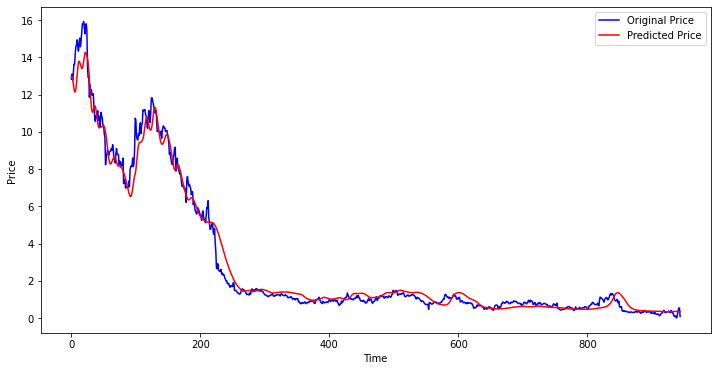

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()